<a href="https://colab.research.google.com/github/AakarshPatel/pytorch-heart-disease/blob/main/03_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction with PyTorch Logistic Regression

This notebook demonstrates the implementation and evaluation of a Logistic Regression model using PyTorch for heart disease prediction. The process involves data loading, preprocessing, model definition, training, and performance evaluation.

## Notebook Contents:
1.  **Data Loading and Inspection**: Loading the training and testing datasets (`X_train`, `y_train`, `X_test`, `y_test`) and displaying their shapes and first few rows.
2.  **PyTorch Logistic Regression Model**: Building a Logistic Regression model using PyTorch's `nn.Module`.
3.  **Model Training**: Training the PyTorch model with Binary Cross Entropy Loss and the Adam optimizer.
4.  **Performance Evaluation**: Calculating and displaying the model's accuracy on the test set.
5.  **Visualization**: Plotting the training loss over epochs and generating a confusion matrix.
6.  **Observations & Analysis**: Summarizing the model's performance, including training vs. test performance and insights from the confusion matrix.

In [3]:
from google.colab import drive
drive.mount('/content/drive')  # Mount Google Drive to access files.

Mounted at /content/drive


In [1]:
import pandas as pd # Import the pandas library for data manipulation

In [7]:
X_train = pd.read_csv('/content/drive/MyDrive/heart_disease/X_train.csv') # Load training features
y_train = pd.read_csv('/content/drive/MyDrive/heart_disease/y_train.csv') # Load training labels
X_test = pd.read_csv('/content/drive/MyDrive/heart_disease/X_test.csv')   # Load test features
y_test = pd.read_csv('/content/drive/MyDrive/heart_disease/y_test.csv')     # Load test labels

In [11]:
print('X_train shape:', X_train.shape)
display(X_train.head())

X_train shape: (237, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-1.720306,-1.446980,-0.164289,0.355633,-0.526877,-0.41145,-1.003419,0.104820,-0.696419,-0.906712,0.643781,-0.721976,-0.89422
1,0.604120,-1.446980,-2.240629,1.032342,-0.141595,-0.41145,-1.003419,0.934409,-0.696419,-0.133621,-0.976583,-0.721976,-0.89422
2,1.600302,-1.446980,-2.240629,0.468418,-0.160859,-0.41145,-1.003419,0.061157,-0.696419,0.639470,-0.976583,1.411625,-0.89422
3,0.382746,0.691095,-1.202459,-0.659431,0.706027,-0.41145,1.010199,0.454120,-0.696419,0.639470,0.643781,-0.721976,-0.89422
4,-0.834811,0.691095,-0.164289,-0.095506,0.108839,-0.41145,-1.003419,1.283709,-0.696419,-0.906712,-0.976583,-0.721976,-0.89422


In [12]:
print('y_train shape:', y_train.shape)
display(y_train.head())

y_train shape: (237, 1)


,num
0,0
1,0
2,0
3,1
4,0


In [13]:
print('X_test shape:', X_test.shape)
display(X_test.head())

X_test shape: (60, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-1.056185,-1.446980,-1.202459,-1.110570,-1.682724,-0.411450,-1.003419,-0.506457,-0.696419,-0.906712,0.643781,-0.721976,-0.89422
1,-0.281376,0.691095,0.873880,-1.110570,-0.334236,-0.411450,-1.003419,0.454120,-0.696419,-0.906712,-0.976583,0.344824,-0.89422
2,-0.060002,-1.446980,-0.164289,0.186456,1.091309,2.430427,-1.003419,0.890746,-0.696419,-0.906712,-0.976583,-0.721976,-0.89422
3,1.710989,0.691095,0.873880,-0.095506,1.438063,-0.411450,1.010199,-1.772671,-0.696419,1.154864,0.643781,2.478425,-0.89422
4,0.161372,0.691095,-1.202459,-0.659431,-0.218651,-0.411450,-1.003419,1.240047,-0.696419,-0.219520,-0.976583,-0.721976,-0.89422


In [14]:
print('y_test shape:', y_test.shape)
display(y_test.head())

y_test shape: (60, 1)


,num
0,0
1,1
2,0
3,1
4,0


In [16]:
import torch          # Import the main PyTorch library
import torch.nn as nn # Import neural network modules from PyTorch
import torch.optim as optim # Import optimization algorithms (like Adam) from PyTorch
from sklearn.metrics import accuracy_score # Import accuracy_score for model evaluation

In [17]:
class LogisticRegressionModel(nn.Module): # Define a class for the Logistic Regression model, inheriting from nn.Module
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__() # Call the constructor of the parent class
        # Define a linear layer: input_dim features to 1 output feature
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x): # Define the forward pass of the model
        # Apply the linear transformation followed by a sigmoid activation function
        # Sigmoid squashes the output to a range between 0 and 1, suitable for probabilities
        outputs = torch.sigmoid(self.linear(x))
        return outputs

In [18]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32) # Convert X_train DataFrame to PyTorch tensor
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1) # Convert y_train to tensor and reshape to column vector
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)   # Convert X_test DataFrame to PyTorch tensor
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)     # Convert y_test to tensor and reshape to column vector

# Get the input dimension (number of features) from the training data
input_dim = X_train_tensor.shape[1]
print(f"Input dimension: {input_dim}")

Input dimension: 13


In [19]:
model_pt = LogisticRegressionModel(input_dim) # Instantiate the Logistic Regression model
criterion = nn.BCELoss() # Define the Binary Cross Entropy Loss function, suitable for binary classification
optimizer = optim.Adam(model_pt.parameters(), lr=0.01) # Initialize the Adam optimizer with model parameters and learning rate

In [22]:
loss_history = [] # Initialize an empty list to store loss values during training
num_epochs = 100 # Set the total number of training epochs
for epoch in range(num_epochs):
    # Forward pass: compute predicted outputs by passing inputs to the model
    outputs = model_pt(X_train_tensor)
    # Calculate the loss by comparing model outputs with actual labels
    loss = criterion(outputs, y_train_tensor)

    # Backward and optimize: backpropagate the loss and update model weights
    optimizer.zero_grad() # Clear previous gradients
    loss.backward()       # Compute gradients of the loss with respect to model parameters
    optimizer.step()      # Update model parameters based on computed gradients

    loss_history.append(loss.item()) # Store the current loss value for plotting

    # Print loss every 10 epochs to monitor training progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.3644
Epoch [20/100], Loss: 0.3632
Epoch [30/100], Loss: 0.3621
Epoch [40/100], Loss: 0.3613
Epoch [50/100], Loss: 0.3606
Epoch [60/100], Loss: 0.3600
Epoch [70/100], Loss: 0.3595
Epoch [80/100], Loss: 0.3592
Epoch [90/100], Loss: 0.3589
Epoch [100/100], Loss: 0.3586


In [21]:
with torch.no_grad(): # Disable gradient calculations during evaluation to save memory and computations
    y_pred_proba_pt = model_pt(X_test_tensor) # Get predicted probabilities on the test set
    # Convert probabilities to binary predictions (0 or 1) using a threshold of 0.5
    y_pred_pt = (y_pred_proba_pt >= 0.5).float()

    # Calculate accuracy by comparing predicted labels with true labels
    # Convert PyTorch tensors to NumPy arrays for sklearn's accuracy_score function
    accuracy_pt = accuracy_score(y_test_tensor.numpy(), y_pred_pt.numpy())
    print(f'PyTorch Logistic Regression Model Accuracy: {accuracy_pt:.4f}')

PyTorch Logistic Regression Model Accuracy: 0.8833


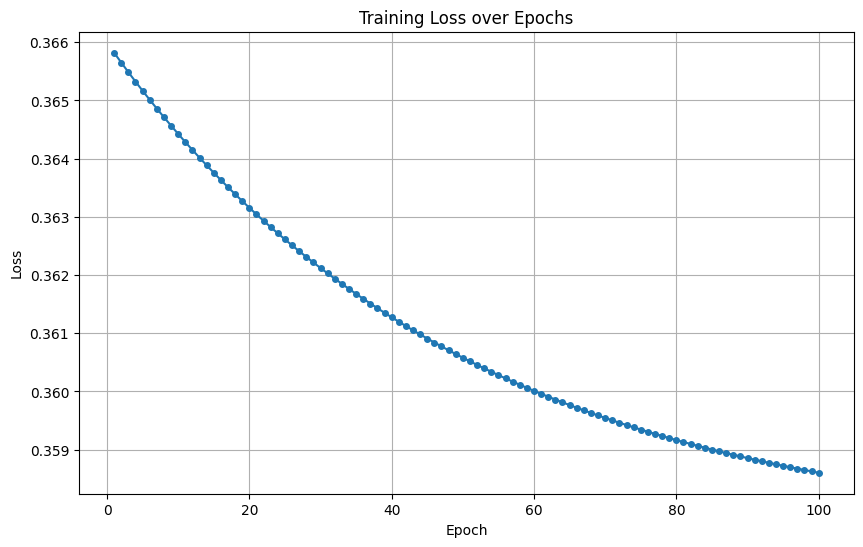

In [23]:
import matplotlib.pyplot as plt # Import matplotlib for plotting

plt.figure(figsize=(10, 6)) # Create a new figure with a specified size
# Plot the training loss over epochs
plt.plot(range(1, num_epochs + 1), loss_history, marker='o', markersize=4, linestyle='-')
plt.title('Training Loss over Epochs') # Set the title of the plot
plt.xlabel('Epoch') # Set the label for the x-axis
plt.ylabel('Loss')   # Set the label for the y-axis
plt.grid(True)     # Display a grid on the plot
plt.show()         # Show the plot

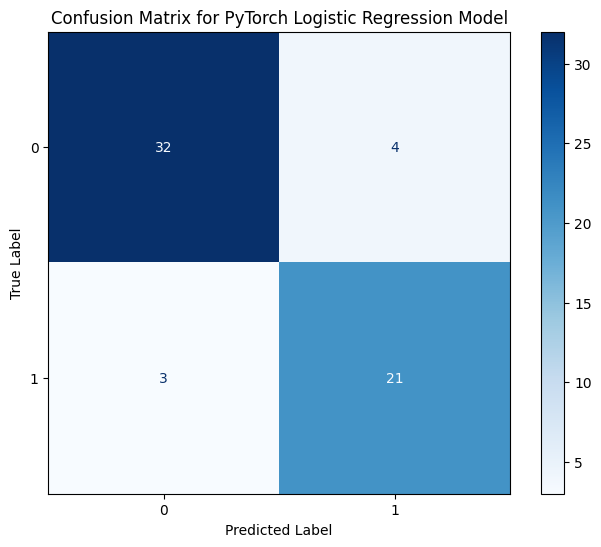

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Import functions for confusion matrix
import numpy as np # Import numpy for numerical operations
import matplotlib.pyplot as plt # Import matplotlib for plotting

# Convert PyTorch tensors to numpy arrays for compatibility with sklearn functions
y_test_np = y_test_tensor.numpy()
y_pred_np = y_pred_pt.numpy()

# Generate the confusion matrix
cm = confusion_matrix(y_test_np, y_pred_np)

# Display the confusion matrix using ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(8, 6)) # Create a figure and axes for the plot
display_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]) # Instantiate ConfusionMatrixDisplay
display_cm.plot(ax=ax, cmap=plt.cm.Blues) # Plot the confusion matrix with a blue colormap
plt.title('Confusion Matrix for PyTorch Logistic Regression Model') # Set the title of the plot
plt.xlabel('Predicted Label') # Set the label for the x-axis
plt.ylabel('True Label')      # Set the label for the y-axis
plt.show()                    # Show the plot

### Performance Summary

**Training Loss Analysis:**

The training loss curve shows a steady decrease over the 100 epochs, indicating that the model is learning effectively and converging. The loss decreased from approximately 0.4980 at epoch 10 to 0.3586 at epoch 100. This continuous reduction suggests that the Adam optimizer is successfully adjusting the model's weights to minimize the binary cross-entropy loss on the training data. The curve appears to flatten out towards the later epochs, suggesting that the model is approaching its optimal performance on the training set and further training might yield diminishing returns, or the learning rate might need adjustment for finer tuning.

**Test Accuracy and Confusion Matrix Analysis:**

The PyTorch Logistic Regression Model achieved a test accuracy of **0.8833** (88.33%). This indicates a strong ability of the model to correctly classify heart disease presence or absence on unseen data.

The confusion matrix provides a detailed breakdown of the model's predictions:
-   **True Positives (TP):** 21 (The model correctly predicted 21 positive cases of heart disease).
-   **True Negatives (TN):** 32 (The model correctly predicted 32 negative cases of heart disease).
-   **False Positives (FP):** 4 (The model incorrectly predicted 4 cases of heart disease where there was none - Type I error).
-   **False Negatives (FN):** 3 (The model incorrectly predicted 3 cases as negative for heart disease when they were actually positive - Type II error).

**Interpretation:**

The model demonstrates a good balance between identifying positive and negative cases. The relatively low number of False Negatives (3) is particularly important in medical diagnosis, as failing to detect an actual disease (Type II error) can have more severe consequences than a false alarm. The False Positives (4) are also low, suggesting the model is not overly aggressive in predicting heart disease when it's not present.

**Overall Conclusion:**

The PyTorch logistic regression model performs well on this heart disease dataset, as evidenced by its decreasing training loss and high test accuracy. The confusion matrix further confirms its robust performance, especially in correctly identifying true positive and true negative cases, while keeping false predictions to a minimum. The model appears to be well-trained without significant signs of overfitting.